# Восстановление золота из руды

<h1>Описание проекта</h1>

Компания разрабатывает решения для эффективной работы промышленных предприятий.

**Цель работы**: подготовить прототип модели машинного обучения для предсказания коэффициента восстановления золота из золотосодержащей руды. Доступны данные с параметрами добычи и очистки. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

**Задачи:**
1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

<h1>Описание данных</h1>

**Наименование признаков:**

Данные представленны в следующем виде:
[этап].[тип_параметра].[название_параметра]

Пример: rougher.input.feed_ag

- Возможные значения для блока [этап]:
    - rougher - флотация
    - primary_cleaner - первичная очистка
    - secondary_cleaner - вторичная очистка
    - final - финальные характеристики
- Возможные значения для блока [тип_параметра]:
    - input - параметры сырья
    - output - параметры продукта
    - state - параметры, характеризующие текущее состояние этапа
    - calculation - расчётные характеристики
- Параметры этапов:
    - air amount - объём воздуха
    - fluid levels - уровень жидкости
    - feed size - размер гранул сырья
    - feed rate - скорость подачи

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Проверка-расчета-эффективности" data-toc-modified-id="Проверка-расчета-эффективности-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка расчета эффективности</a></span></li><li><span><a href="#Признаки,-недоступные-в-тестовой-выборке" data-toc-modified-id="Признаки,-недоступные-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Признаки, недоступные в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Анализ-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ концентрации металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Анализ--распределения-размеров-гранул-сырья-в-обучающей-и-тестовой-выборках" data-toc-modified-id="Анализ--распределения-размеров-гранул-сырья-в-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ  распределения размеров гранул сырья в обучающей и тестовой выборках</a></span></li><li><span><a href="#Анализ-суммарной-концентрации-веществ-на-различных-этапах-очистки" data-toc-modified-id="Анализ-суммарной-концентрации-веществ-на-различных-этапах-очистки-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ суммарной концентрации веществ на различных этапах очистки</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Подготовка-к-обучению-моделей" data-toc-modified-id="Подготовка-к-обучению-моделей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка к обучению моделей</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Прогнозирование-эффективности-обогащения-чернового-концентрата" data-toc-modified-id="Прогнозирование-эффективности-обогащения-чернового-концентрата-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Прогнозирование эффективности обогащения чернового концентрата</a></span></li><li><span><a href="#Прогнозирование-эффективности-обогащения-финального--концентрата" data-toc-modified-id="Прогнозирование-эффективности-обогащения-финального--концентрата-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Прогнозирование эффективности обогащения финального  концентрата</a></span></li><li><span><a href="#Результаты-обучения" data-toc-modified-id="Результаты-обучения-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Результаты обучения</a></span></li></ul></li><li><span><a href="#Тестирование-лучших-моделей" data-toc-modified-id="Тестирование-лучших-моделей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Тестирование лучших моделей</a></span></li><li><span><a href="#Проверка-моделей-на-адекватность" data-toc-modified-id="Проверка-моделей-на-адекватность-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка моделей на адекватность</a></span></li></ul></li><li><span><a href="#Выводы-по-работе" data-toc-modified-id="Выводы-по-работе-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы по работе</a></span></li></ul></div>

## Подготовка данных

### Изучение данных

*Подлкючим необходимые библиотеки.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer

*Настроим отображение датафреймов.*

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

*Загрузим данные и сохраним их в соответствующих переменных.*

In [3]:
def read_csv(link_1, link_2):
    try:
        data = pd.read_csv(link_1)
    except:
        data = pd.read_csv(link_2)
    return data

In [4]:
gold_recovery_train_new = read_csv('C:\\Users\\user\\Desktop\\jupiter_notebook\\sp2\\gold_recovery_train_new.csv', '/datasets/gold_recovery_train_new.csv')
gold_recovery_test_new = read_csv('C:\\Users\\user\\Desktop\\jupiter_notebook\\sp2\\gold_recovery_test_new.csv', '/datasets/gold_recovery_test_new.csv')
gold_recovery_full_new = read_csv('C:\\Users\\user\\Desktop\\jupiter_notebook\\sp2\\gold_recovery_full_new.csv', '/datasets/gold_recovery_full_new.csv')

*Изучим общую информацию о датафреймах.*

In [5]:
gold_recovery_full_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [6]:
gold_recovery_train_new.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148

In [7]:
gold_recovery_train_new.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [8]:
gold_recovery_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [9]:
gold_recovery_test_new.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

In [10]:
gold_recovery_test_new.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5287.000000,5289.000000,5269.000000,5290.000000,5285.000000,5290.000000,5282.000000,5265.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5287.000000,5290.000000,5288.000000,5290.000000,5281.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,1.544844e+03,-500.199527,9.371940,3.798082,489.800620,55.951097,37.716648,9.334682,13.855759,6.467745,13.922328,6.512103,1053.400166,-395.732530,1318.926879,-475.241428,1301.595477,-474.836671,1214.847960,-475.682272,1056.648995,-469.029688,997.949719,-470.482465,26.312630,-502.750897,21.949119,-501.987097,25.402926,-507.490314,2.098211e+01,-506.627916,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,1.247731e+02,31.045257,1.926264,0.954859,108.036326,19.081758,5.491415,1.619521,3.350852,1.065114,3.223769,0.886989,121.139309,91.085505,156.450366,45.649466,171.269667,45.859866,185.763319,47.844967,131.542839,59.325990,128.218869,60.759318,3.429852,28.756505,4.354961,34.582722,6.526457,47.620908,6.736179e+00,44.528673,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,4.039220e-32,-799.794250,0.568441,0.273677,0.002986,0.046369,1.393488,0.568632,0.001147,0.000568,0.000077,0.006985,-0.042069,-657.949759,-0.721806,-650.245277,-0.056636,-647.544439,-0.992219,-648.390665,-1.982295,-649.267537,-2.593390,-649.949283,0.20

In [11]:
gold_recovery_full_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [12]:
gold_recovery_full_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [13]:
gold_recovery_full_new.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [14]:
gold_recovery_full_new.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438

*В ходе изучения общей информации о датасете, было обнаружено наличие большого количества пропущенных значений в данных.*

### Проверка расчета эффективности

*Проведем проверку расчета эффективности обогощения. Для этого вычислим величину средней абсолютной ошибки.*

*Рассчитаем эффективность обогощения чернового концентрата вручную.*

In [15]:
calc_recovery = (gold_recovery_train_new['rougher.output.concentrate_au'] *\
    (gold_recovery_train_new['rougher.input.feed_au'] -\
    gold_recovery_train_new['rougher.output.tail_au']))/\
    (gold_recovery_train_new['rougher.input.feed_au'] *\
    (gold_recovery_train_new['rougher.output.concentrate_au'] -\
    gold_recovery_train_new['rougher.output.tail_au'])) * 100

*Сохраним столбец со значениями эффективности в отдельную переменную.*

In [16]:
true_recovery = gold_recovery_train_new['rougher.output.recovery']

*Вычислим величину ошибки.*

In [17]:
print(mean_absolute_error(true_recovery, calc_recovery))

9.73512347450521e-15


*Полученное значение крайне мало и говорит о том, что эффективность обогощения рассчитано правильно.*

### Признаки, недоступные в тестовой выборке

*Изучим отсутствующие в тестовой выборке признаки.*

In [18]:
arr = []
for name in gold_recovery_train_new.columns:
    if name not in gold_recovery_test_new.columns:
        arr.append(name)
display(arr)

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

*Отсутствующие признаки либо характеризуют продукт, либо содержат информацию о расчетных характеристиках. Присутствие этих признаков в тестовой выборке могло привести к утечке целевого признака, что недопустимо.*

### Предобработка данных

*Как было замечено ранее, в датафреймах имеются пропусков, в некоторых столбцах их количество доходит до 10% от общего количества данных. Удаление строк с пропущенными значениями может привести к потере важной информации, поэтому будем рассматривать альтернативные способы борьбы с ними. В условиях задания сказано, что соседние по времени параметры часто похожи, поэтому заполним пропуски, используя метод `forward fill`, который заменяет пропущенные значения последним известным перед ними.*

In [19]:
gold_recovery_train_new = gold_recovery_train_new.fillna(method='ffill')
gold_recovery_test_new = gold_recovery_test_new.fillna(method='ffill')
gold_recovery_full_new = gold_recovery_full_new.fillna(method='ffill')

*Выполним проверку на явные дубликаты.*

In [20]:
print('Количество явных дубликатов в тренировочном датасете:', gold_recovery_train_new.duplicated().sum())
print('Количество явных дубликатов в тестовом датасете:', gold_recovery_test_new.duplicated().sum())
print('Количество явных дубликатов в исходном датасете:', gold_recovery_full_new.duplicated().sum())

Количество явных дубликатов в тренировочном датасете: 0
Количество явных дубликатов в тестовом датасете: 0
Количество явных дубликатов в исходном датасете: 0


*Дубликаты отсутствуют.*

**Вывод:** в ходе выполнения данного этапа работы были изучены исходные данные. Было обнаружено, что в исходных данных имеются пропуски, которые впоследствии были заменены на последние известные перед ними значения. Была проведена проверка расчета эффективности обогощения чернового концентрата золотосодержащей руды. Ошибок в расчете не выявлено.

Был проведен анализ признаков, отсутствующих в тестовой выборке. В ходе анализа выявлено, что отсутствующие признаки либо характеризуют продукт, либо содержат информацию о расчетных характеристиках. Присутствие этих признаков в тестовой выборке могло привести к утечке целевого признака, что недопустимо.

Также была проведена проверка на наличие явных дубликатов, их наличие не обнаружено.

## Анализ данных

### Анализ концентрации металлов (Au, Ag, Pb) на различных этапах очистки

*Напишем функцию для визуализации распределений.*

In [21]:
def plot_creator_conc(df, value_1, value_2, value_3, value_4, lbl_1, lbl_2, lbl_3, lbl_4, xlbl, ylbl, ttl):
    plt.figure(figsize=(16,9))
    sns.histplot(data=df, x=value_1, label=lbl_1, color='#f5c20a', kde=True)
    sns.histplot(data=df, x=value_2, label=lbl_2, color='#0af531', kde=True)
    sns.histplot(data=df, x=value_3, label=lbl_3, color='#0a78f5', kde=True)
    sns.histplot(data=df, x=value_4, label=lbl_4, color='#f50a25', kde=True)
    plt.xlabel(xlbl, fontsize=16)
    plt.ylabel(ylbl, fontsize=16)
    plt.legend(fontsize=12)
    plt.title(ttl, fontsize=18);

*Напишем функцию, которая сохранит статистические показатели в таблицу.*

In [22]:
def add_row(df, data, metall, pre_flot, post_flot, post_prim_cl, post_sec_cl):
    df.at[len(df), df.columns[0]] = metall
    df.at[len(df) - 1, df.columns[1]] = round(data[pre_flot].mean(), 3)
    df.at[len(df) - 1, df.columns[2]] = round(data[pre_flot].median(), 3)
    df.at[len(df) - 1, df.columns[3]] = round(data[post_flot].mean(), 3)
    df.at[len(df) - 1, df.columns[4]] = round(data[post_flot].median(), 3)
    df.at[len(df) - 1, df.columns[5]] = round(data[post_prim_cl].mean(), 3)
    df.at[len(df) - 1, df.columns[6]] = round(data[post_prim_cl].median(), 3)
    df.at[len(df) - 1, df.columns[7]] = round(data[post_sec_cl].mean(), 3)
    df.at[len(df) - 1, df.columns[8]] = round(data[post_sec_cl].median(), 3)
    
    return df

*Изучим распределение концентрации золота на различных этапах очистки.*

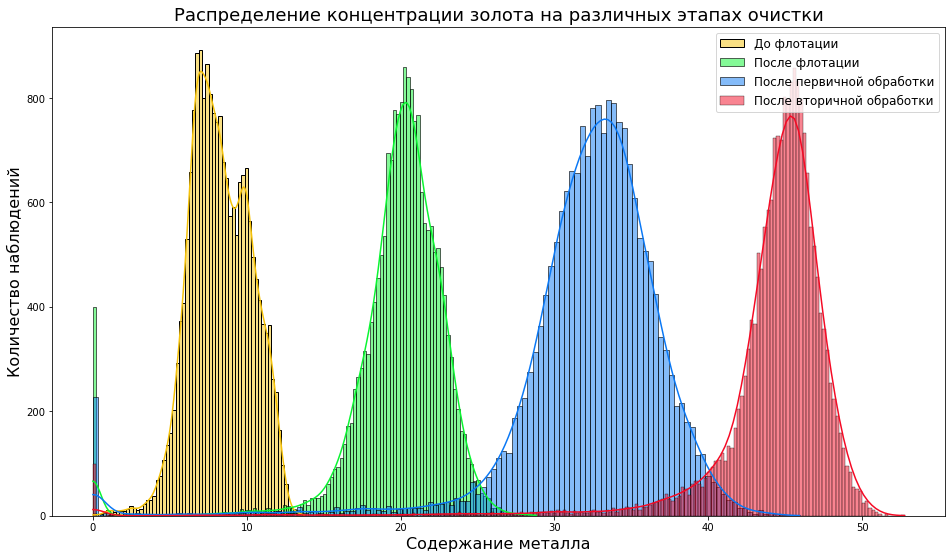

In [23]:
plot_creator_conc(gold_recovery_full_new, 
             'rougher.input.feed_au', 'rougher.output.concentrate_au',
             'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au',
             'До флотации', 'После флотации', 'После первичной обработки', 'После вторичной обработки', 
             'Содержание металла', 'Количество наблюдений', 
             'Распределение концентрации золота на различных этапах очистки')

*Изучим распределение концентрации серебра на различных этапах очистки.*

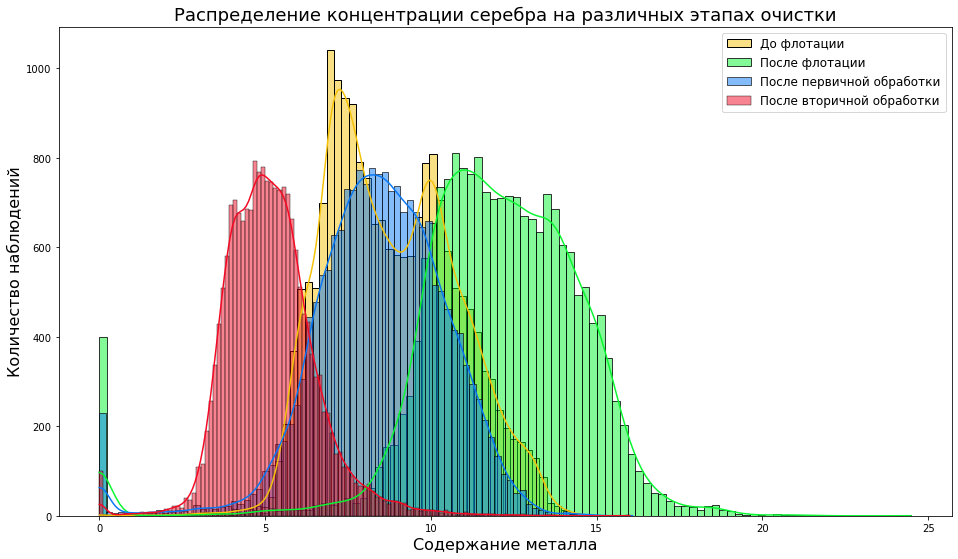

In [24]:
plot_creator_conc(gold_recovery_full_new, 
             'rougher.input.feed_ag', 'rougher.output.concentrate_ag',
             'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag',
             'До флотации', 'После флотации', 'После первичной обработки', 'После вторичной обработки', 
             'Содержание металла', 'Количество наблюдений', 
             'Распределение концентрации серебра на различных этапах очистки')

*Изучим распределение концентрации свинца на различных этапах очистки.*

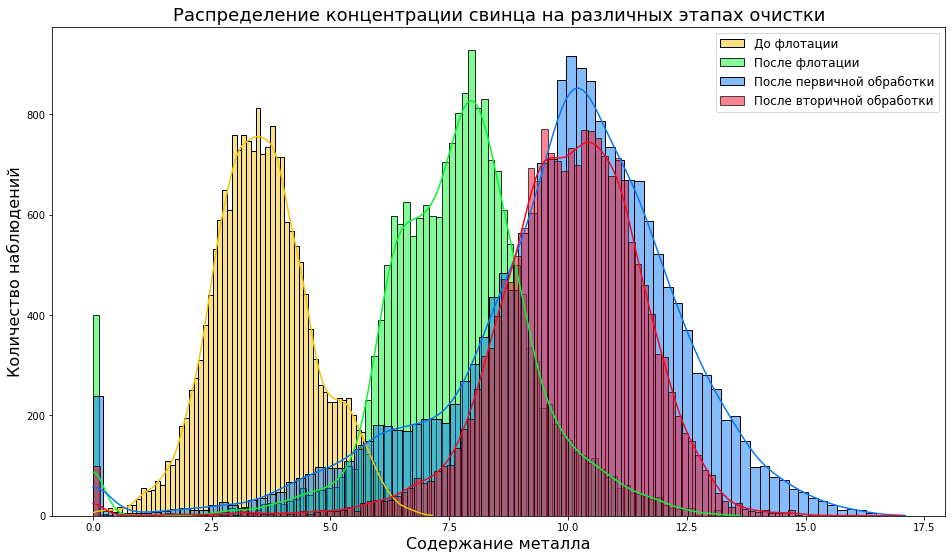

In [25]:
plot_creator_conc(gold_recovery_full_new, 
             'rougher.input.feed_pb', 'rougher.output.concentrate_pb',
             'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb',
             'До флотации', 'После флотации', 'После первичной обработки', 'После вторичной обработки', 
             'Содержание металла', 'Количество наблюдений', 
             'Распределение концентрации свинца на различных этапах очистки')

*Сохраним статистические показатели в датафрейм.*

In [26]:
dist_results = pd.DataFrame(columns=['Металл', 'До флотации. Среднее', 'До флотации. Медиана', 
                             'После флотации. Среднее', 'После флотации. Медиана', 
                             'После первичной очистки. Среднее', 'После первичной очистки. Медиана',
                             'После вторичной очистки. Среднее', 'После вторичной очистки. Медиана',])

In [27]:
add_row(dist_results, gold_recovery_full_new, 'Золото', 
        'rougher.input.feed_au', 'rougher.output.concentrate_au', 
        'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au')
add_row(dist_results, gold_recovery_full_new, 'Серебро', 
        'rougher.input.feed_ag', 'rougher.output.concentrate_ag', 
        'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag')
add_row(dist_results, gold_recovery_full_new, 'Свинец', 
        'rougher.input.feed_pb', 'rougher.output.concentrate_pb', 
        'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb')

,Металл,До флотации. Среднее,До флотации. Медиана,После флотации. Среднее,После флотации. Медиана,После первичной очистки. Среднее,После первичной очистки. Медиана,После вторичной очистки. Среднее,После вторичной очистки. Медиана
0,Золото,8.266,8.126,19.772,20.28,32.119,32.841,44.077,45.011
1,Серебро,8.795,8.594,11.995,12.098,8.442,8.507,5.168,5.066
2,Свинец,3.585,3.528,7.606,7.743,9.81,10.142,9.979,10.102


*Глядя на полученные распределения и статистические параметры, можно сделать следующие выводы:*

- *Концентрация золота растет на каждом этапе очистки, увеличив свои значения почти в 7 раз: с 8.27% в исходном сырье до 44.08% в финальном концентрате.*
- *Концентрация серебра в черновом концентрате увеличивается по сравнению с исхохным сырьем, но на последующих этапах очистки содержание этого металла стремительно падает, дойдя до 5.17% в финальном концентрате.*
- *Концентрация свинца увеличивается на этапах флотации и первичной очистки, но затем рост останавливается и остается в примерно тех же значениях, что может говорить о снижении содержания металла в финальном концентрате.*

*Стоит так же отметить наличие концентратов с нулевым или близким к нулевому содержанием металлов*

### Анализ  распределения размеров гранул сырья в обучающей и тестовой выборках

*Изучим распределение размеров гранул в исходном сырье и черновом концентрате в обучающей и тестовой выборках, дабы избежать ошибок в предсказаниях моделей. Для этого напишем следующую функцию.*

In [28]:
def plot_creator_size(df_1, df_2, value_1, value_2, lbl_1, lbl_2, xlbl, ylbl, ttl):
    plt.figure(figsize=(16,9))
    sns.histplot(data=df_1, x=value_1, label=lbl_1, color='#f5c20a', kde=True)
    sns.histplot(data=df_2, x=value_2, label=lbl_2, color='#f50a25', kde=True)
    plt.xlabel(xlbl, fontsize=16)
    plt.ylabel(ylbl, fontsize=16)
    plt.legend(fontsize=12)
    plt.title(ttl, fontsize=18);

*Рассмотрим размер гранул в исходном сырье.*

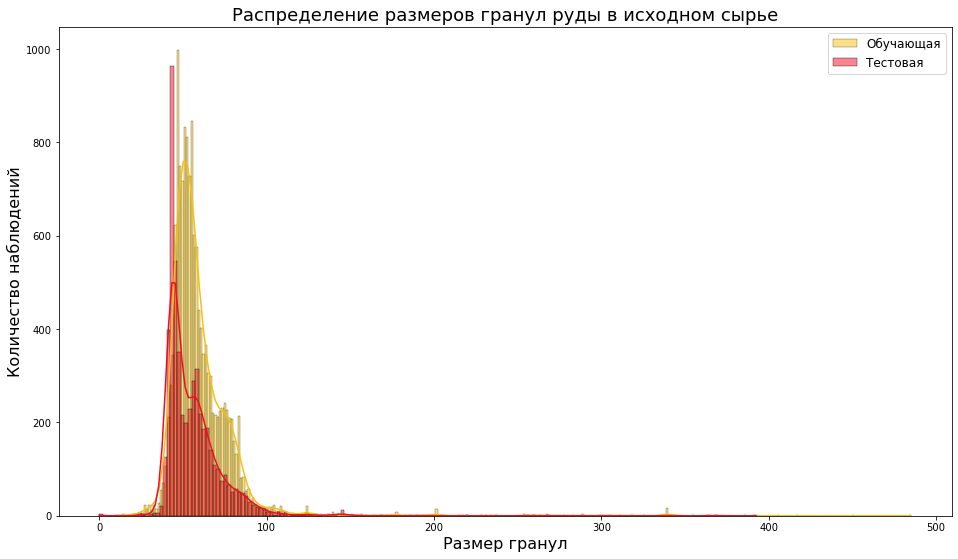

In [29]:
plot_creator_size(gold_recovery_train_new, gold_recovery_test_new, 
             'rougher.input.feed_size', 'rougher.input.feed_size', 
             'Обучающая', 'Тестовая', 
             'Размер гранул', 'Количество наблюдений', 
             'Распределение размеров гранул руды в исходном сырье')

*В черновом концентрате.*

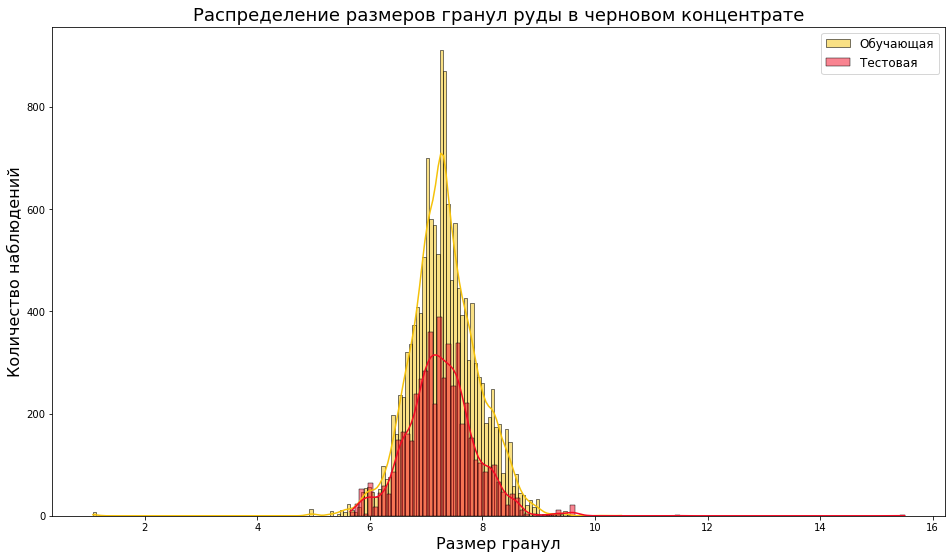

In [30]:
plot_creator_size(gold_recovery_train_new, gold_recovery_test_new, 
             'primary_cleaner.input.feed_size', 'primary_cleaner.input.feed_size', 
             'Обучающая', 'Тестовая', 
             'Размер гранул', 'Количество наблюдений', 
             'Распределение размеров гранул руды в черновом концентрате')

*Полученные распределения размеров гранул сырья на различных этапах очистки находятся в примерно похожих диапазонах значений. Разница в количестве наблюдений обусловлена разными размерами самих выборок: тестовая выборка в 3 раза меньше обучающей. Соответственно, ошибок, вызванных разными распределениями размеров гранул, быть не может.*

### Анализ суммарной концентрации веществ на различных этапах очистки

*Изучим суммарную концентрацию веществ на всех этапах очистки. Для начала напишем функцию, которая посчитает концентрацию веществ.*

In [31]:
def get_sum(df, value_1, value_2, value_3, value_4):
    return df[value_1] + df[value_2] + df[value_3] + df[value_4]

*Найдем суммарные концентрации.*

*Исходное сырье. Обучающая выборка.*

In [32]:
gold_recovery_train_new['rougher.input.feed_sum'] = get_sum(gold_recovery_train_new, 
                                              'rougher.input.feed_au', 
                                              'rougher.input.feed_ag', 
                                              'rougher.input.feed_pb', 
                                              'rougher.input.feed_sol')

*Черновой концентрат. Обучающая выборка.*

In [33]:
gold_recovery_train_new['rougher.output.concentrate_sum'] = get_sum(gold_recovery_train_new,
                                               'rougher.output.concentrate_au',
                                               'rougher.output.concentrate_ag',
                                               'rougher.output.concentrate_pb',
                                               'rougher.output.concentrate_sol')

*Концентрат после первичной обработки. Обучающая выборка.*

In [34]:
gold_recovery_train_new['primary_cleaner.output.concentrate_sum'] = get_sum(gold_recovery_train_new, 
                                               'primary_cleaner.output.concentrate_au',
                                               'primary_cleaner.output.concentrate_ag',
                                               'primary_cleaner.output.concentrate_pb',
                                               'primary_cleaner.output.concentrate_sol')

*Финальный концентрат. Обучающая выборка.*

In [35]:
gold_recovery_train_new['final.output.concentrate_sum'] = get_sum(gold_recovery_train_new,
                                               'final.output.concentrate_au',
                                               'final.output.concentrate_ag',
                                               'final.output.concentrate_pb',
                                               'final.output.concentrate_sol')

*Построим распределение суммарной концентрации.*

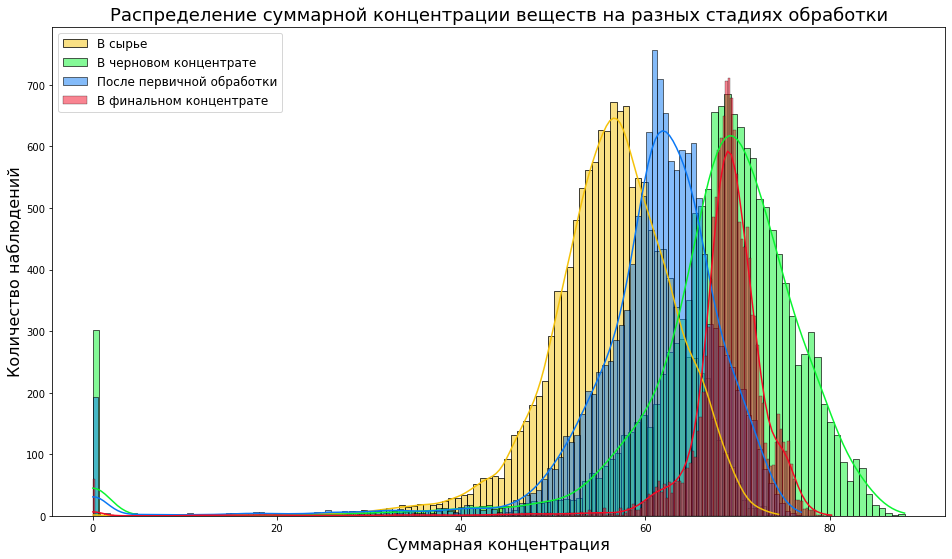

In [36]:
plot_creator_conc(gold_recovery_train_new, 
                     'rougher.input.feed_sum', 'rougher.output.concentrate_sum',
                     'primary_cleaner.output.concentrate_sum', 'final.output.concentrate_sum', 
                     'В сырье', 'В черновом концентрате', 'После первичной обработки', 'В финальном концентрате',
                     'Суммарная концентрация', 'Количество наблюдений',
                     'Распределение суммарной концентрации веществ на разных стадиях обработки')

*Как и в пункте 2.1 на распределениях суммарной концентрации наблюдается скопление показаний в околонулевой зоне. Построим диаграммы размаха для детального изучения распределений.*

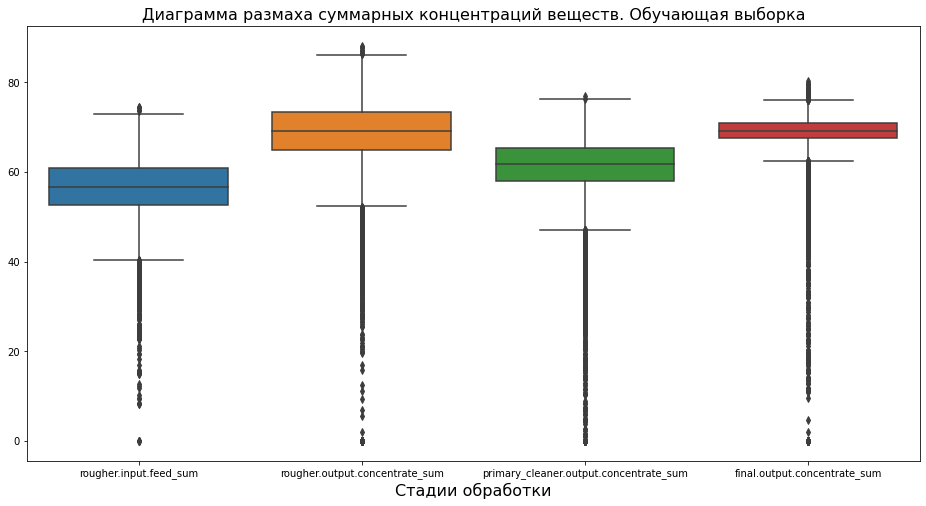

In [37]:
plt.figure(figsize=(16,8))
sns.boxplot(data=gold_recovery_train_new[['rougher.input.feed_sum', 'rougher.output.concentrate_sum',\
                                          'primary_cleaner.output.concentrate_sum', 'final.output.concentrate_sum']], orient='v')
plt.xlabel('Стадии обработки', fontsize=16)
plt.title('Диаграмма размаха суммарных концентраций веществ. Обучающая выборка', fontsize=16);

*Исходное сырье. Тестовая выборка.*

In [38]:
gold_recovery_test_new['rougher.input.feed_sum'] = get_sum(gold_recovery_test_new, 
                                         'rougher.input.feed_au', 
                                         'rougher.input.feed_ag', 
                                         'rougher.input.feed_pb', 
                                         'rougher.input.feed_sol')

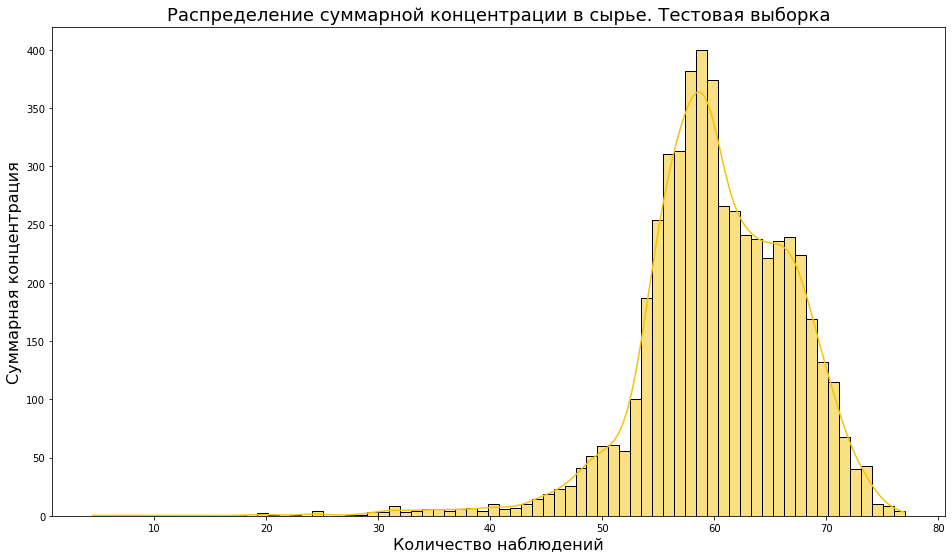

In [39]:
plt.figure(figsize=(16,9))
sns.histplot(data=gold_recovery_test_new, x='rougher.input.feed_sum', color='#f5c20a', kde=True)
plt.xlabel('Количество наблюдений', fontsize=16)
plt.ylabel('Суммарная концентрация', fontsize=16)
plt.title('Распределение суммарной концентрации в сырье. Тестовая выборка', fontsize=18);

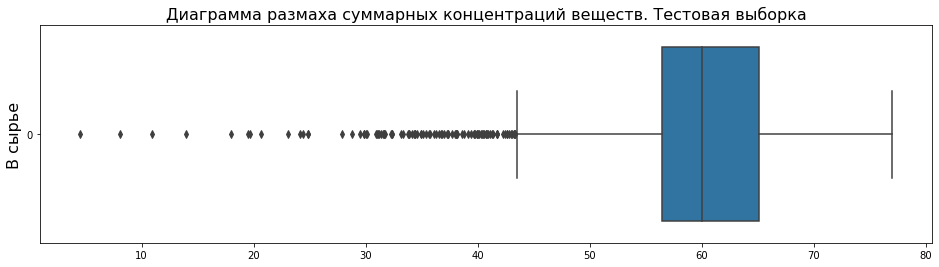

In [40]:
plt.figure(figsize=(16, 4))
sns.boxplot(data=gold_recovery_test_new['rougher.input.feed_sum'], orient='h')
plt.ylabel('В сырье', fontsize=16)
plt.title('Диаграмма размаха суммарных концентраций веществ. Тестовая выборка', fontsize=16);

*Основная масса показаний расположилась в диапазоне от 40 до 80 процентов. Дабы исключить возможное негативное влияние показаний с нулевой суммарной концентрацией металлов, признаем их выбросами и избавимся от них.*

In [41]:
gold_recovery_train_new = gold_recovery_train_new.query('(`rougher.input.feed_sum` > 0)\
and (`rougher.output.concentrate_sum` > 0) and (`primary_cleaner.output.concentrate_sum` > 0)\
and (`final.output.concentrate_sum` > 0)')

In [42]:
gold_recovery_test_new = gold_recovery_test_new.query('`rougher.input.feed_sum` > 0')

**Вывод:** в ходе выполнения данного этапа работы были сделаны следующие выводы:

*Анализ концентрации металлов (Au, Ag, Pb) на различных этапах очистки:*
- Концентрация золота растет на каждом этапе очистки, увеличив свои значения почти в 7 раз: с 8.27% в исходном сырье до 44.08% в финальном концентрате.
- Концентрация серебра в черновом концентрате увеличивается по сравнению с исхохным сырьем, но на последующих этапах очистки содержание этого металла стремительно падает, дойдя до 5.17% в финальном концентрате.
- Концентрация свинца увеличивается на этапах флотации и первичной очистки, но затем рост останавливается и остается в примерно тех же значениях, что может говорить о снижении содержания металла в финальном концентрате.
- Стоит так же отметить наличие концентратов с нулевым или близким к нулевому содержанием металлов.
   
*Анализ  распределения размеров гранул сырья в обучающей и тестовой выборках:*

Полученные распределения размеров гранул сырья на различных этапах очистки находятся в примерно похожих диапазонах значений. Разница в количестве наблюдений обусловлена разными размерами самих выборок: тестовая выборка в 3 раза меньше обучающей. Соответственно, ошибок, вызванных разными распределениями размеров гранул, быть не может.

*Анализ суммарной концентрации веществ на различных этапах очистки:*

Основная масса показаний расположилась в диапазоне от 40 до 80 процентов. Дабы исключить возможное негативное влияние показаний с нулевой суммарной концентрацией металлов, было принято решение признать их выбросами и избавиться от них.

## Модель

### Подготовка к обучению моделей

*Прежде чем приступить к обучению моделей, добавим в тестовую выборку целевые признаки.*

In [43]:
gold_recovery_test_new = gold_recovery_test_new.merge(
    gold_recovery_full_new[['date', 'rougher.output.recovery']], 
    on='date', 
    how='left'
)

gold_recovery_test_new = gold_recovery_test_new.merge(
    gold_recovery_full_new[['date', 'final.output.recovery']], 
    on='date', 
    how='left'
)

In [44]:
gold_recovery_test_new = gold_recovery_test_new.rename(
    columns={'rougher.output.recovery_x':'rougher.output.recovery', 'final.output.recovery_x':'final.output.recovery'}
)

In [45]:
gold_recovery_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 56 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5290 non-null   float64
 2   primary_cleaner.input.depressant            5290 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

*Напишем фунцию для вычисления метрики качества.*

In [46]:
def sMAPE(target, predicted):
    return sum(abs(target - predicted)/((abs(target) + abs(predicted)) / 2) / len(target) * 100)

In [47]:
def total_sMAPE(result_1, result_2):
    return 0.25 * result_1 + 0.75 * result_2

*Напишем функцию, которая сохранит результаты в таблицу.*

In [48]:
def add_result(df, model_name, result_1, result_2):
    df.at[len(df), df.columns[0]] = model_name
    df.at[len(df) - 1, df.columns[1]] = round(abs(result_1), 3)
    df.at[len(df) - 1, df.columns[2]] = round(abs(result_2), 3)
    
    return df

*Создадим датафрейм для хранения результатов.*

In [49]:
model_results = pd.DataFrame(columns=['Модель', 'sMAPE. Черновой концентрат', 'sMAPE. Финальный концентрат'])

### Обучение моделей

#### Прогнозирование эффективности обогащения чернового концентрата

*Сформируем обучающую выборку с необходимыми параметрами, которые актуальны на этапе флотации.*
*Для этого сформируем train и test датасеты со следующими колонками:*

In [50]:
rougher_columns = [
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_rate',
    'rougher.input.feed_size',
    'rougher.input.feed_sol',
    'rougher.input.feed_au',
    'rougher.input.floatbank10_sulfate',
    'rougher.input.floatbank10_xanthate',
    'rougher.input.floatbank11_sulfate',
    'rougher.input.floatbank11_xanthate',
    'rougher.state.floatbank10_a_air',
    'rougher.state.floatbank10_a_level',
    'rougher.state.floatbank10_b_air',
    'rougher.state.floatbank10_b_level',
    'rougher.state.floatbank10_c_air',
    'rougher.state.floatbank10_c_level',
    'rougher.state.floatbank10_d_air',
    'rougher.state.floatbank10_d_level',
    'rougher.state.floatbank10_e_air',
    'rougher.state.floatbank10_e_level',
    'rougher.state.floatbank10_f_air',
    'rougher.state.floatbank10_f_level'
]

*Разделим данные на features и target.*

In [51]:
features_rougher_train = gold_recovery_train_new[rougher_columns]
features_rougher_test = gold_recovery_test_new[rougher_columns]

In [52]:
target_rougher_train = gold_recovery_train_new['rougher.output.recovery']
target_rougher_test = gold_recovery_test_new['rougher.output.recovery']

*Обучим модели.*

`LinearRegression`

In [53]:
model = LinearRegression()
scores = cross_val_score(model, features_rougher_train, target_rougher_train, scoring=make_scorer(sMAPE, greater_is_better=False), cv=3)
results_lr_float = abs(pd.Series(scores).mean())
print('Наилучший sMAPE:', results_lr_float)

Наилучший sMAPE: 9.008842290513856


*Для обучения остальным моделей напишем функцию, которая будет выполнять кросс-валидацию.*

In [54]:
def crossval(model, params, features, target):
    
    param_dist = params  

    cv = GridSearchCV(model,
                      param_grid=param_dist,
                      cv = 3,
                      scoring = make_scorer(sMAPE, greater_is_better = False)
                    )
    
    cv.fit(features, target)
    
    return cv.best_params_, cv.best_score_

`DesicionTreeRegressor`

In [55]:
%%time
DTR = DecisionTreeRegressor()
parameters = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth':[5, 10, 15]
}
results_dtr_float = crossval(DTR, parameters, features_rougher_train, target_rougher_train)

print('Наилучшие параметры: ', results_dtr_float[0])
print('Наилучший sMAPE: ', abs(results_dtr_float[1]))

Наилучшие параметры:  {'criterion': 'absolute_error', 'max_depth': 5}
Наилучший sMAPE:  8.24501276986951
CPU times: total: 1min 20s
Wall time: 1min 19s


`RandomForrestRegressor`

In [56]:
%%time
RFR = RandomForestRegressor()
parameters = {
    'n_estimators':[10, 30, 50],
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth':[5, 10, 15]
}
results_rfr_float = crossval(RFR, parameters, features_rougher_train, target_rougher_train)

print('Наилучшие параметры: ', results_rfr_float[0])
print('Наилучший sMAPE: ', abs(results_rfr_float[1]))

Наилучшие параметры:  {'criterion': 'friedman_mse', 'max_depth': 5, 'n_estimators': 30}
Наилучший sMAPE:  7.71655838981633
CPU times: total: 42min 19s
Wall time: 42min 21s


#### Прогнозирование эффективности обогащения финального  концентрата

*Сформируем обучающую выборку с необходимыми параметрами, которые актуальны на этапе очистки. Так как входные параметры чернового концентрата зависят от этапа флотации, считаю нужным учитывать данные и из этого этапа. Для этого сформируем train и test датасеты со следующими колонками:*

In [57]:
final_columns = [
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_rate',
    'rougher.input.feed_size',
    'rougher.input.feed_sol',
    'rougher.input.feed_au',
    'rougher.input.floatbank10_sulfate',
    'rougher.input.floatbank10_xanthate',
    'rougher.input.floatbank11_sulfate',
    'rougher.input.floatbank11_xanthate',
    'rougher.state.floatbank10_a_air',
    'rougher.state.floatbank10_a_level',
    'rougher.state.floatbank10_b_air',
    'rougher.state.floatbank10_b_level',
    'rougher.state.floatbank10_c_air',
    'rougher.state.floatbank10_c_level',
    'rougher.state.floatbank10_d_air',
    'rougher.state.floatbank10_d_level',
    'rougher.state.floatbank10_e_air',
    'rougher.state.floatbank10_e_level',
    'rougher.state.floatbank10_f_air',
    'rougher.state.floatbank10_f_level',
    'primary_cleaner.input.sulfate',
    'primary_cleaner.input.depressant',
    'primary_cleaner.input.feed_size',
    'primary_cleaner.input.xanthate',
    'primary_cleaner.state.floatbank8_a_air',
    'primary_cleaner.state.floatbank8_a_level',
    'primary_cleaner.state.floatbank8_b_air',
    'primary_cleaner.state.floatbank8_b_level',
    'primary_cleaner.state.floatbank8_c_air',
    'primary_cleaner.state.floatbank8_c_level',
    'primary_cleaner.state.floatbank8_d_air',     
    'primary_cleaner.state.floatbank8_d_level',
    'secondary_cleaner.state.floatbank2_a_air',
    'secondary_cleaner.state.floatbank2_a_level',
    'secondary_cleaner.state.floatbank2_b_air',
    'secondary_cleaner.state.floatbank2_b_level',
    'secondary_cleaner.state.floatbank3_a_air',
    'secondary_cleaner.state.floatbank3_a_level',
    'secondary_cleaner.state.floatbank3_b_air',
    'secondary_cleaner.state.floatbank3_b_level',
    'secondary_cleaner.state.floatbank4_a_air',
    'secondary_cleaner.state.floatbank4_a_level',
    'secondary_cleaner.state.floatbank4_b_air',
    'secondary_cleaner.state.floatbank4_b_level',
    'secondary_cleaner.state.floatbank5_a_air',
    'secondary_cleaner.state.floatbank5_a_level',
    'secondary_cleaner.state.floatbank5_b_air',
    'secondary_cleaner.state.floatbank5_b_level',
    'secondary_cleaner.state.floatbank6_a_air',
    'secondary_cleaner.state.floatbank6_a_level'
]

*Разделим данные на features и target.*

In [58]:
features_final_train = gold_recovery_train_new[final_columns]
features_final_test = gold_recovery_test_new[final_columns]

In [59]:
target_final_train = gold_recovery_train_new['final.output.recovery']
target_final_test = gold_recovery_test_new['final.output.recovery']

*Обучим модели.*

`LinearRegression`

In [60]:
model = LinearRegression()
scores = cross_val_score(model, features_final_train, target_final_train, scoring=make_scorer(sMAPE, greater_is_better=False), cv=3)
results_lr_final = abs(pd.Series(scores).mean())
print('Наилучший sMAPE:', results_lr_final)

Наилучший sMAPE: 13.421883586284835


`DesicionTreeRegressor`

In [61]:
%%time
DTR = DecisionTreeRegressor()
parameters = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth':[5, 10, 15]
}
results_dtr_final = crossval(DTR, parameters, features_final_train, target_final_train)

print('Наилучшие параметры: ', results_dtr_final[0])
print('Наилучший sMAPE: ', abs(results_dtr_final[1]))

Наилучшие параметры:  {'criterion': 'absolute_error', 'max_depth': 5}
Наилучший sMAPE:  11.047191127847787
CPU times: total: 3min 12s
Wall time: 3min 11s


`RandomForrestRegressor`

In [62]:
%%time
RFR = RandomForestRegressor()
parameters = {
    'n_estimators':[10, 30, 50],
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth':[5, 10, 15]
}
results_rfr_final = crossval(RFR, parameters, features_final_train, target_final_train)

print('Наилучшие параметры: ', results_rfr_final[0])
print('Наилучший sMAPE: ', abs(results_rfr_final[1]))

Наилучшие параметры:  {'criterion': 'absolute_error', 'max_depth': 5, 'n_estimators': 50}
Наилучший sMAPE:  10.090162932797261
CPU times: total: 1h 56min 59s
Wall time: 1h 57min 16s


#### Результаты обучения

*Сохраним полученные результаты в таблицу*

In [63]:
add_result(model_results, 'LinearRegression', results_lr_float, results_lr_final)
add_result(model_results, 'DecisionTreeRegressor', results_dtr_float[1], results_dtr_final[1])
add_result(model_results, 'RandomForestRegressor', results_rfr_float[1], results_rfr_final[1])

display(model_results)

,Модель,sMAPE. Черновой концентрат,sMAPE. Финальный концентрат
0,LinearRegression,9.009,13.422
1,DecisionTreeRegressor,8.245,11.047
2,RandomForestRegressor,7.717,10.09


*Наилучшие результаты на обоих этапах обогощения золота показала модель RandomForestRegressor.*

### Тестирование лучших моделей

*Обучим лучшие модели на тестовой сборке и вычислим итоговое значение sMAPE*

In [64]:
final_model_float = RandomForestRegressor(criterion='poisson', max_depth=50, n_estimators=50)
final_model_float.fit(features_rougher_train, target_rougher_train)
predicted_float = final_model_float.predict(features_rougher_test)
predictions_float = pd.Series(predicted_float, index=target_rougher_test.index)
rougher_sMAPE = sMAPE(target_rougher_test, predictions_float)
print('sMAPE на этапе флотации: ', rougher_sMAPE)

sMAPE на этапе флотации:  8.240244910746094


In [65]:
final_model_final = RandomForestRegressor(criterion='squared_error', max_depth=10, n_estimators=50)
final_model_final.fit(features_final_train, target_final_train)
predicted_final = final_model_final.predict(features_final_test)
predictions_final = pd.Series(predicted_final, index=target_final_test.index)
final_sMAPE = sMAPE(target_final_test, predictions_final)
print('sMAPE на этапе очистки: ', final_sMAPE)

sMAPE на этапе очистки:  9.592553953172123


*Вычислим итоговое sMAPE.*

In [66]:
print('Итоговое sMAPE: ', total_sMAPE(rougher_sMAPE, final_sMAPE))

Итоговое sMAPE:  9.254476692565616


### Проверка моделей на адекватность

*Для того, чтобы оценить работу нашей модели, сравним ее результаты с результатами модели, которая в качестве предсказаний использует медиану целевых признаков, вычисленную при обучении.*

In [67]:
dummy_model_float = DummyRegressor(strategy='quantile', quantile=0.5)
dummy_model_float.fit(features_rougher_train, target_rougher_train)
predicted_dummy_float = dummy_model_float.predict(features_rougher_test)
predictions_dummy_float = pd.Series(predicted_dummy_float, index=target_rougher_test.index)
rougher_dummy_sMAPE = sMAPE(target_rougher_test, predictions_dummy_float)
print('sMAPE на этапе флотации: ', rougher_dummy_sMAPE)

sMAPE на этапе флотации:  8.524314629416798


In [68]:
dummy_model_final = DummyRegressor(strategy='quantile', quantile=0.5)
dummy_model_final.fit(features_final_train, target_final_train)
predicted_dummy_final = dummy_model_final.predict(features_final_test)
predictions_dummy_final = pd.Series(predicted_dummy_final, index=target_final_test.index)
final_dummy_sMAPE = sMAPE(target_final_test, predictions_dummy_final)
print('sMAPE на этапе флотации: ', final_dummy_sMAPE)

sMAPE на этапе флотации:  9.74733570189708


*Вычислим итоговое sMAPE.*

In [69]:
print('Итоговое sMAPE дамми-модели: ', total_sMAPE(rougher_dummy_sMAPE, final_dummy_sMAPE))

Итоговое sMAPE дамми-модели:  9.44158043377701


*Полученные результаты говорят о том, что модели, которые мы выбрали в качестве модели прогнозирования, превосходят дамми-модель. Хоть эта разница невелика, будем считать, что наши модели прошли проверку на адекватность.*

**Вывод:** Написана функция для вычисления итогового значения sMAPE. Сформированы обучающие и тестовые выборки с необходимыми параметрами, которые актуальны на этапах флотации и очистки.

Написана функция поиска наилучших параметров и лучшего sMAPE с помощью кроссвалидации. С её помощью происследованы модели и получены результаты на этапе флотации и очистки.

Обучив эти модели на соответствующих обучающих датасетах, мы предсказали значения эффективности обогащения по тестовому датасету.
На этапе флотации метрика sMAPE оказалась равной 8.24 На этапе очистки - 9.59.
Итоговое значение - 9.25.

Для того, чтобы оценить работу нашей модели, результаты сравнивались с результатами модели, которая в качестве предсказаний использует медиану целевых признаков, вычисленную при обучении. Итоговое значение дамми-модели 9.44.

Полученные результаты говорят о том, что модели, которые мы выбрали в качестве модели прогнозирования, превосходят дамми-модель. Хоть эта разница невелика, будем считать, что наши модели прошли проверку на адекватность.

## Выводы по работе

**Подготовка данных**

В ходе выполнения данного этапа работы были изучены исходные данные. Было обнаружено, что в исходных данных имеются пропуски, которые впоследствии были заменены на последние известные перед ними значения. Была проведена проверка расчета эффективности обогощения чернового концентрата золотосодержащей руды. Ошибок в расчете не выявлено.

Был проведен анализ признаков, отсутствующих в тестовой выборке. В ходе анализа выявлено, что отсутствующие признаки либо характеризуют продукт, либо содержат информацию о расчетных характеристиках. Присутствие этих признаков в тестовой выборке могло привести к утечке целевого признака, что недопустимо.

Также была проведена проверка на наличие явных дубликатов, их наличие не обнаружено.

**Анализ данных**

В ходе анализа данных были получены следующие статистические показатели:

In [70]:
display(dist_results)

,Металл,До флотации. Среднее,До флотации. Медиана,После флотации. Среднее,После флотации. Медиана,После первичной очистки. Среднее,После первичной очистки. Медиана,После вторичной очистки. Среднее,После вторичной очистки. Медиана
0,Золото,8.266,8.126,19.772,20.28,32.119,32.841,44.077,45.011
1,Серебро,8.795,8.594,11.995,12.098,8.442,8.507,5.168,5.066
2,Свинец,3.585,3.528,7.606,7.743,9.81,10.142,9.979,10.102


И сделаны следующие выводы:

*Анализ концентрации металлов (Au, Ag, Pb) на различных этапах очистки:*
- Концентрация золота растет на каждом этапе очистки, увеличив свои значения почти в 7 раз: с 8.27% в исходном сырье до 44.08% в финальном концентрате.
- Концентрация серебра в черновом концентрате увеличивается по сравнению с исхохным сырьем, но на последующих этапах очистки содержание этого металла стремительно падает, дойдя до 5.17% в финальном концентрате.
- Концентрация свинца увеличивается на этапах флотации и первичной очистки, но затем рост останавливается и остается в примерно тех же значениях, что может говорить о снижении содержания металла в финальном концентрате.
- Стоит так же отметить наличие концентратов с нулевым или близким к нулевому содержанием металлов.
   
*Анализ  распределения размеров гранул сырья в обучающей и тестовой выборках:*

Полученные распределения размеров гранул сырья на различных этапах очистки находятся в примерно похожих диапазонах значений. Разница в количестве наблюдений обусловлена разными размерами самих выборок: тестовая выборка в 3 раза меньше обучающей. Соответственно, ошибок, вызванных разными распределениями размеров гранул, быть не может.

*Анализ суммарной концентрации веществ на различных этапах очистки:*

Основная масса показаний расположилась в диапазоне от 40 до 80 процентов. Дабы исключить возможное негативное влияние показаний с нулевой суммарной концентрацией металлов, было принято решение признать их выбросами и избавиться от них.

**Обучение моделей**

Написана функция для вычисления итогового значения sMAPE. Сформированы обучающие и тестовые выборки с необходимыми параметрами, которые актуальны на этапах флотации и очистки.

Написана функция поиска наилучших параметров и лучшего sMAPE с помощью кроссвалидации. С её помощью происследованы модели и получены результаты на этапе флотации и очистки.

In [71]:
display(model_results)

,Модель,sMAPE. Черновой концентрат,sMAPE. Финальный концентрат
0,LinearRegression,9.009,13.422
1,DecisionTreeRegressor,8.245,11.047
2,RandomForestRegressor,7.717,10.09


Наилучшие результаты на обоих этапах обогощения золота показала модель RandomForestRegressor.

Обучив эти модели на соответствующих обучающих датасетах, мы предсказали значения эффективности обогащения по тестовому датасету.
На этапе флотации метрика sMAPE оказалась равной 8.24 На этапе очистки - 9.59.
Итоговое значение - 9.25.

Для того, чтобы оценить работу нашей модели, результаты сравнивались с результатами модели, которая в качестве предсказаний использует медиану целевых признаков, вычисленную при обучении. Итоговое значение дамми-модели 9.44.

Полученные результаты говорят о том, что модели, которые мы выбрали в качестве модели прогнозирования, превосходят дамми-модель. Хоть эта разница невелика, будем считать, что наши модели прошли проверку на адекватность.